In [9]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pystan

In [11]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [1]:
#import fbprophet

In [2]:
## 输出高清图像
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt
#画图前的文字、颜色等设置
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'  #显示中文
plt.rcParams['axes.unicode_minus'] = False  #显示负号

### 加载数据

In [1]:
#### 加载数据并进行统计描述
from pandas import read_csv
import pandas as pd
# 加载数据
df = read_csv(r'C:\Users\lmr18\Desktop\canada.csv',encoding='gbk')#数据
print(df.shape)
print(df.head())
df =df.loc[:,['date','总死亡']]
df=df[['date','总死亡']]

(330, 11)
       date  Unnamed: 1      总确诊    日确诊    总死亡  日死亡       死亡率     疫苗总剂次  \
0  2022/4/1         NaN  3502380  12470  37666   69  0.005533  82236389   
1  2022/4/2         NaN  3509394   7014  37699   33  0.004705  82265892   
2  2022/4/3         NaN  3511975   2581  37716   17  0.006587  82295372   
3  2022/4/4         NaN  3512535    560  37729   13  0.023214  82308457   
4  2022/4/5         NaN  3521439   8904  37772   43  0.004829  82331416   

       接种人数   疫苗剂次  新增接种人数  
0  32581126  20000    1200  
1  32582606  29503    1480  
2  32583954  29480    1348  
3  32584569  13085     615  
4  32585784  22959    1215  


In [10]:
##df['死亡率']=df['死亡率'].astype(float)

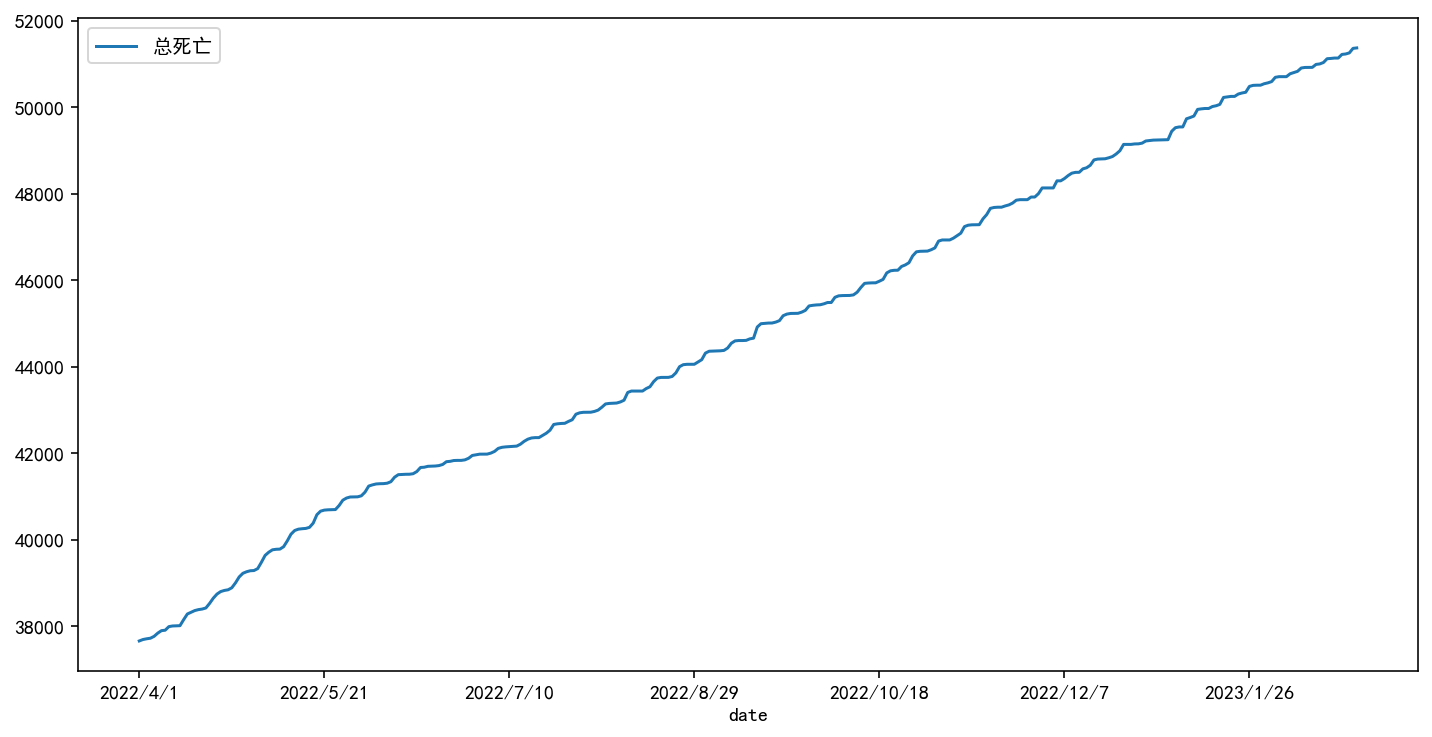

In [3]:
# 画时序图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
df.index=df['date']
df.plot(figsize=(12,6))
#plt.savefig('p1.png', dpi=750, bbox_inches = 'tight')
plt.show()

In [4]:
df.rename(columns={'date':'ds', '总死亡':'y'}, inplace = True)

### 划分训练集测试集

In [5]:
from pandas import to_datetime
from fbprophet import Prophet
df['ds']= to_datetime(df['ds'])
trainsize= int(len(df)*0.7)
trainlist= df[:trainsize]
testlist= df[trainsize:]

In [6]:
trainlist.shape

(230, 2)

In [7]:
testlist.shape

(100, 2)

### 拟合训练集,并预测

In [3]:
# trainlist['cap'] = trainlist.y.values.max()
# trainlist['floor'] = trainlist.y.values.min()
# m = Prophet(
#         changepoint_prior_scale=0.001, 
#         #changepoint_range=0.7,
#         seasonality_prior_scale=0.1,
#         holidays_prior_scale=0.01,
#         daily_seasonality=False,
#         #yearly_seasonality=True, #年周期性
#         weekly_seasonality=True #周周期性
#         ##holidays=holidays,#节假日
#         #growth="linear" ##线性回归
#     )
# m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.1)#添加月周期性 
# #m.add_country_holidays(country_name='US')

In [8]:
trainlist['cap'] = trainlist.y.values.max()
trainlist['floor'] = trainlist.y.values.min()
m = Prophet(
#         daily_seasonality=False,
#         yearly_seasonality=True, #年周期性
         weekly_seasonality=True, #周周期性
#         ##holidays=holidays,#节假日
#         growth="logistic" ##线性回归
    )
m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.1)#添加月周期性 
#m.add_country_holidays(country_name='US')

C:\Users\lmr18\AppData\Local\Temp/ipykernel_11384/1275675441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainlist['cap'] = trainlist.y.values.max()
C:\Users\lmr18\AppData\Local\Temp/ipykernel_11384/1275675441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainlist['floor'] = trainlist.y.values.min()


In [32]:
m.fit(trainlist)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [33]:
future = m.make_future_dataframe(periods=100, freq='D')#预测时长
future['cap'] = trainlist.y.values.max()
future['floor'] = trainlist.y.values.min()
forecast = m.predict(future)

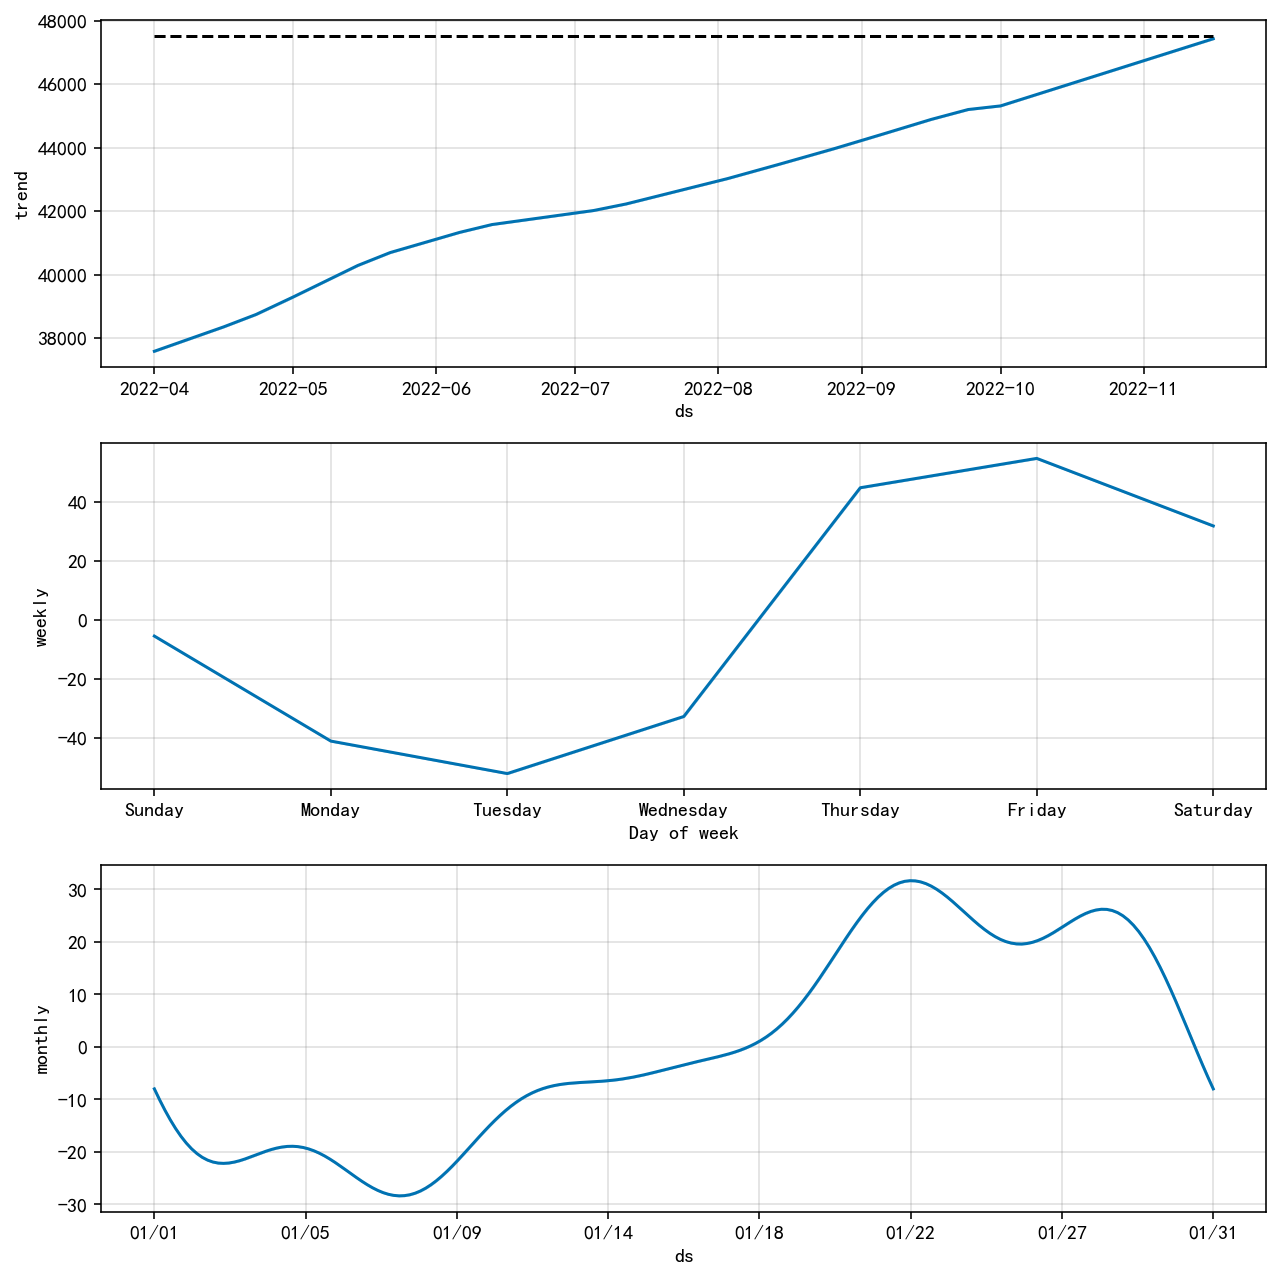

In [30]:
forecast = m.predict(trainlist)   
fig = m.plot_components(forecast)

In [12]:
#forecast = m.predict(future)   
# fig = m.plot_components(forecast)
# plt.savefig('3.png', dpi=750, bbox_inches = 'tight')
# plt.show()
forecast[['ds','trend','weekly','weekly_lower','weekly_upper', 'yhat']].tail()

,ds,trend,weekly,weekly_lower,weekly_upper,yhat
325,2023-02-20,51916.461022,-40.840185,-40.840185,-40.840185,51846.754174
326,2023-02-21,51963.086171,-51.744394,-51.744394,-51.744394,51884.403639
327,2023-02-22,52009.711321,-32.299515,-32.299515,-32.299515,51953.325211
328,2023-02-23,52056.336471,44.836146,44.836146,44.836146,52082.285796
329,2023-02-24,52102.961620,54.327502,54.327502,54.327502,52148.176926


In [13]:
forecast['yhat'].to_csv('20.csv')

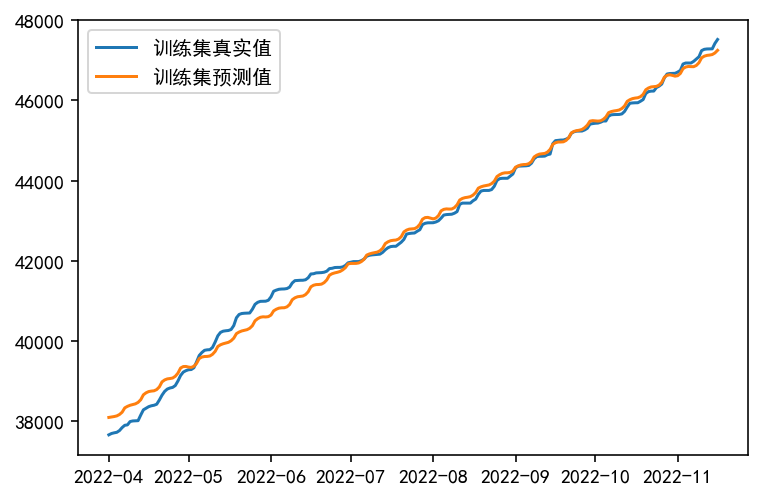

In [34]:
plt.plot(trainlist['ds'],trainlist['y'], label='训练集真实值')
plt.plot(forecast.iloc[0:230]['ds'],forecast.iloc[0:230]['yhat'], label='训练集预测值')
plt.legend()
#plt.savefig('p2.png', dpi=750, bbox_inches = 'tight')
plt.show()

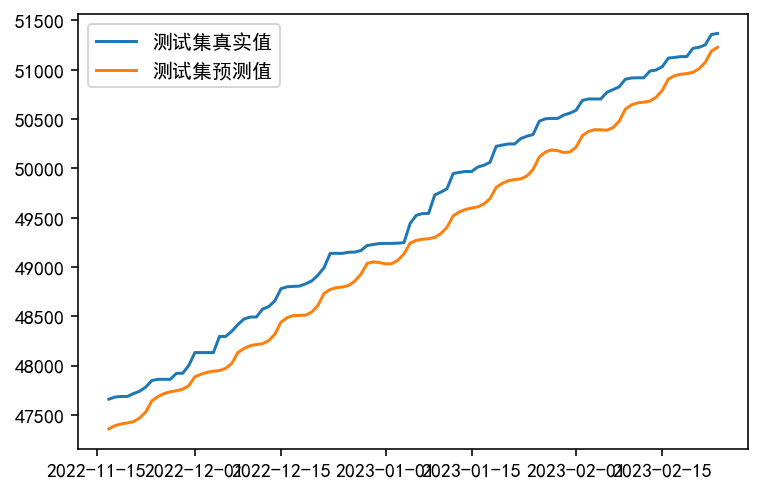

In [35]:
plt.plot(testlist['ds'],testlist['y'],label='测试集真实值')
plt.plot(forecast.iloc[230:330]['ds'],forecast.iloc[230:330]['yhat'],label='测试集预测值')
plt.legend()
#plt.savefig('p3.png', dpi=750, bbox_inches = 'tight')
plt.show()

In [28]:
trainlist['y']

date
2022/4/1      37666
2022/4/2      37699
2022/4/3      37716
2022/4/4      37729
2022/4/5      37772
              ...  
2022/11/12    47281
2022/11/13    47282
2022/11/14    47284
2022/11/15    47419
2022/11/16    47517
Name: y, Length: 230, dtype: int64

### 评估模型效果

In [36]:
## 评估模型
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
test=testlist['y'].values.reshape(-1,1)
test1 = scaler.fit_transform(test)
fore=forecast.iloc[230:330]['yhat'].values.reshape(-1,1)
fore1=scaler.fit_transform(fore)
# calculate MSE 均方误差
mse=mean_squared_error(test1,fore1)
# calculate RMSE 均方根误差
rmse = math.sqrt(mean_squared_error(test1,fore1))
#calculate MAE 平均绝对误差
mae=mean_absolute_error(test1,fore1)
#calculate R square
r_square=r2_score(test,fore)
print('均方误差MSE: %.6f' % mse)
print('均方根误差RMSE: %.6f' % rmse)
print('平均绝对误差MAE: %.6f' % mae)
print('R_square: %.6f' % r_square)

均方误差MSE: 0.001019
均方根误差RMSE: 0.031929
平均绝对误差MAE: 0.026581
R_square: 0.930027


### 求最优参数

In [128]:
from fbprophet import Prophet
import pandas as pd
from matplotlib import pyplot as plt
import logging
logging.getLogger('prophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")
import itertools
import numpy as np
import pandas as pd
from fbprophet.diagnostics import cross_validation
## 输出高清图像
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from pandas import read_csv
from pandas import to_datetime

In [130]:
##############第一部分的运行的结果，可以直白的看到，预测值yhat和真实值之间的关系#############
# 加载数据
df = read_csv(r'C:\Users\lmr18\Desktop\US.csv',encoding='gbk')
df =df.loc[:,['date','日死亡']]
df.head()
df.rename(columns={'date':'ds', '日死亡':'y'}, inplace = True)
df['ds']= to_datetime(df['ds'])
#创建一个Prophet时间序列模型
m = Prophet()
m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.1)
#添加月周期性 
m.add_country_holidays(country_name='US')
m.fit(df)
#要预测的时间，这里指定是366天
future = m.make_future_dataframe(periods=100)
#使用交叉验证的方法进行验证
#我们做交叉验证来评估预测horizon在365天的性能，从第一次截止initial时730天的训练数据开始，
# 然后每180天进行一次预测。
df_cv = cross_validation(m, initial='200 days', period='30 days', horizon = '100 days')
df_cv.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-11-16 00:00:00 and 2022-11-16 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-11-17,459.493637,294.297312,627.797455,528,2022-11-16
1,2022-11-18,380.733614,199.156667,552.694436,510,2022-11-16
2,2022-11-19,7.045849,-165.871432,173.287695,23,2022-11-16
3,2022-11-20,-47.910381,-215.137398,105.971104,20,2022-11-16
4,2022-11-21,274.831092,91.603427,445.916388,211,2022-11-16


In [131]:
#######################第二部分，自定义截止日期
# 相隔六个月的三个截止需要以cutoffs日期格式传递给参数
cutoffs = pd.to_datetime(['2022-11-16'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='100 days')

  0%|          | 0/1 [00:00<?, ?it/s]

In [132]:
##################第三部分是预测性能的评价，可以得到所有评价准则的值
from fbprophet.diagnostics import performance_metrics
#performance_metrics实用程序可用于计算预测性能的测试
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,10 days,20526.762480,143.271639,113.300019,0.413373,0.8
1,11 days,20596.490730,143.514775,113.791319,0.608944,0.8
2,12 days,19104.629062,138.219496,105.096917,0.608944,0.8
3,13 days,19131.495100,138.316648,105.788848,0.413373,0.8
4,14 days,28854.729534,169.866799,130.910842,0.413373,0.7


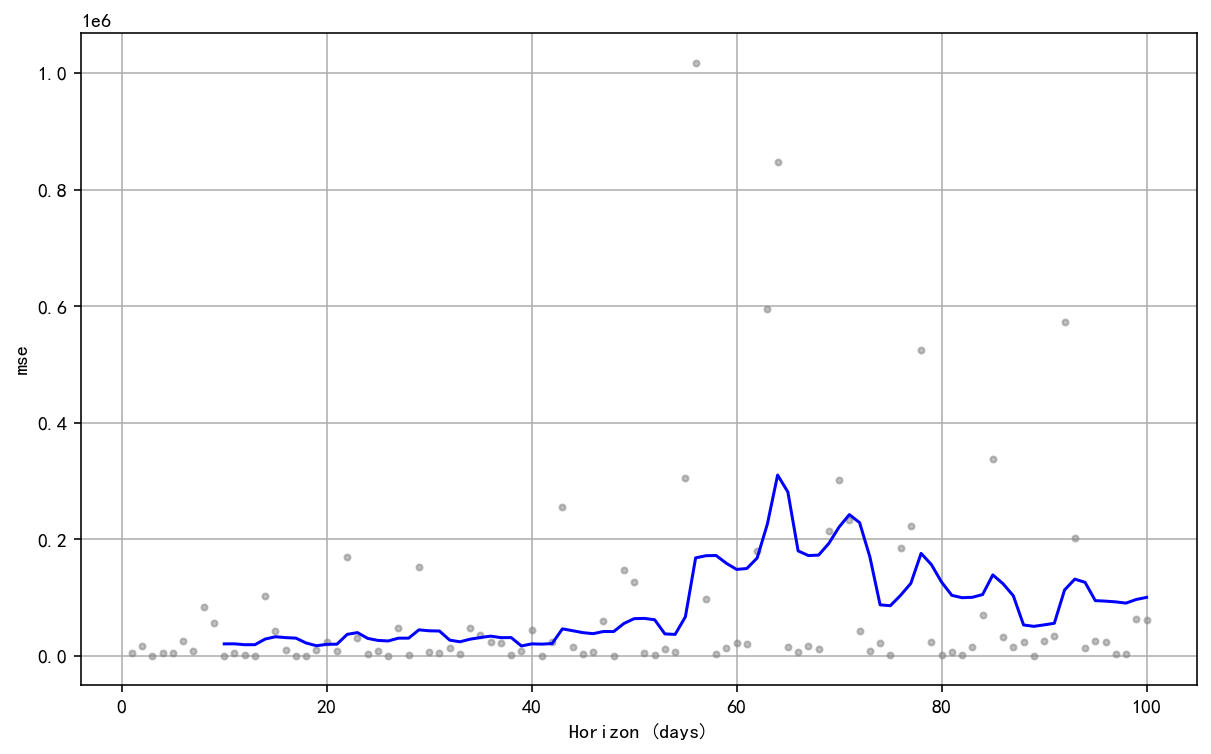

In [133]:
##################第四部分是将指定的性能评价显示出来
from fbprophet.plot import plot_cross_validation_metric
#mse
fig = plot_cross_validation_metric(df_cv, metric='mse')

In [134]:
##################第五部分：是一个通过参数的值设置测试评价指标的值，并得到最优的参数
#设置改变点尺度参数和季节尺度的参数，参数越大说明影响越大
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
}
 
# 生成所有的参数组合【0.001，0.01】【0.001，0.1】【0.001，1】【0.001，10】一共16种组合
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
#在这里存储每个参数的rmse
mses = []
 
# 使用交叉验证来计算所有参数
for params in all_params:
    m = Prophet(**params).fit(df)  #用给定的参数拟合模型
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='60 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    mses.append(df_p['mse'].values[0])
 
# 求解误差最优解
tuning_results = pd.DataFrame(all_params)
tuning_results['mse'] = mses
print(tuning_results)
# 打印最佳的两个尺度值
best_params = all_params[np.argmin(mses)]
print(best_params)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001BA99B83BB0>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001BA9B0F22E0>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001BA98E566A0>
INFO:fbprophet:Disabling 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001BA9959C100>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001BA99B83EB0>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001BA9B0F2730>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling 

INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001BA91865970>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001BA99B83D30>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001BA99B32E50>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying i

NameError: name 'mses' is not defined

In [2]:
# from fbprophet import Prophet
# import pandas as pd
# from matplotlib import pyplot as plt
# import logging
# logging.getLogger('prophet').setLevel(logging.ERROR)
# import warnings
# warnings.filterwarnings("ignore")
# import itertools
# import numpy as np
# import pandas as pd
# from fbprophet.diagnostics import cross_validation
# ## 输出高清图像
# %config InlineBackend.figure_format = 'retina'
# %matplotlib inline
# from pandas import read_csv
# from pandas import to_datetime
# ##############第一部分的运行的结果，可以直白的看到，预测值yhat和真实值之间的关系#############
# # 加载数据
# df = read_csv(r'C:\Users\lmr18\Desktop\数据.csv',encoding='gbk')
# df =df.loc[:,['date','日确诊']]
# df.head()
# df.rename(columns={'date':'ds', '日确诊':'y'}, inplace = True)
# df['ds']= to_datetime(df['ds'])
# #创建一个Prophet时间序列模型
# m = Prophet()
# m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.1)
# #添加月周期性 
# m.add_country_holidays(country_name='US')
# m.fit(df)
# #要预测的时间，这里指定是366天
# future = m.make_future_dataframe(periods=30)
# #使用交叉验证的方法进行验证
# #我们做交叉验证来评估预测horizon在365天的性能，从第一次截止initial时730天的训练数据开始，
# # 然后每180天进行一次预测。
# df_cv = cross_validation(m, initial='553 days', period='60 days', horizon = '230 days')
# df_cv.head()
# #######################第二部分，自定义截止日期
# # 相隔六个月的三个截止需要以cutoffs日期格式传递给参数
# cutoffs = pd.to_datetime(['2022-06-05', '2022-08-04', '2022-10-03'])
# df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='230 days')
# ##################第三部分是预测性能的评价，可以得到所有评价准则的值
# from fbprophet.diagnostics import performance_metrics
# #performance_metrics实用程序可用于计算预测性能的测试
# df_p = performance_metrics(df_cv)
# df_p.head()
# ##################第四部分是将指定的性能评价显示出来
# from fbprophet.plot import plot_cross_validation_metric
# #mse
# fig = plot_cross_validation_metric(df_cv, metric='mse')
# ##################第五部分：是一个通过参数的值设置测试评价指标的值，并得到最优的参数
# #设置改变点尺度参数和季节尺度的参数，参数越大说明影响越大
# param_grid = {
#     'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
#     'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
#     'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
# }
 
# # 生成所有的参数组合【0.001，0.01】【0.001，0.1】【0.001，1】【0.001，10】一共16种组合
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# #在这里存储每个参数的rmse
# rmses = []
 
# # 使用交叉验证来计算所有参数
# for params in all_params:
#     m = Prophet(**params).fit(df)  #用给定的参数拟合模型
#     df_cv = cross_validation(m, cutoffs=cutoffs, horizon='60 days', parallel="processes")
#     df_p = performance_metrics(df_cv, rolling_window=1)
#     rmses.append(df_p['rmse'].values[0])
 
# # 求解误差最优解
# tuning_results = pd.DataFrame(all_params)
# tuning_results['mse'] = mses
# print(tuning_results)
# # 打印最佳的两个尺度值
# best_params = all_params[np.argmin(mses)]
# print(best_params)

### 定位突变点

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


There are 25 change points. 
The change points dates are 
                  ds    y
date                     
2022/4/8  2022-04-08   10
2022/4/16 2022-04-16   39
2022/4/23 2022-04-23   58
2022/4/30 2022-04-30   36
2022/5/8  2022-05-08   12
2022/5/15 2022-05-15   10
2022/5/22 2022-05-22    7
2022/5/30 2022-05-30    1
2022/6/6  2022-06-06    2
2022/6/13 2022-06-13    1
2022/6/21 2022-06-21   10
2022/6/28 2022-06-28   12
2022/7/5  2022-07-05   23
2022/7/12 2022-07-12    5
2022/7/20 2022-07-20   52
2022/7/27 2022-07-27   38
2022/8/3  2022-08-03   31
2022/8/11 2022-08-11  180
2022/8/18 2022-08-18  119
2022/8/25 2022-08-25  144
2022/9/2  2022-09-02   43
2022/9/9  2022-09-09   54
2022/9/16 2022-09-16   77
2022/9/24 2022-09-24   15
2022/10/1 2022-10-01    9


Text(64.0, 0.5, '日死亡数')

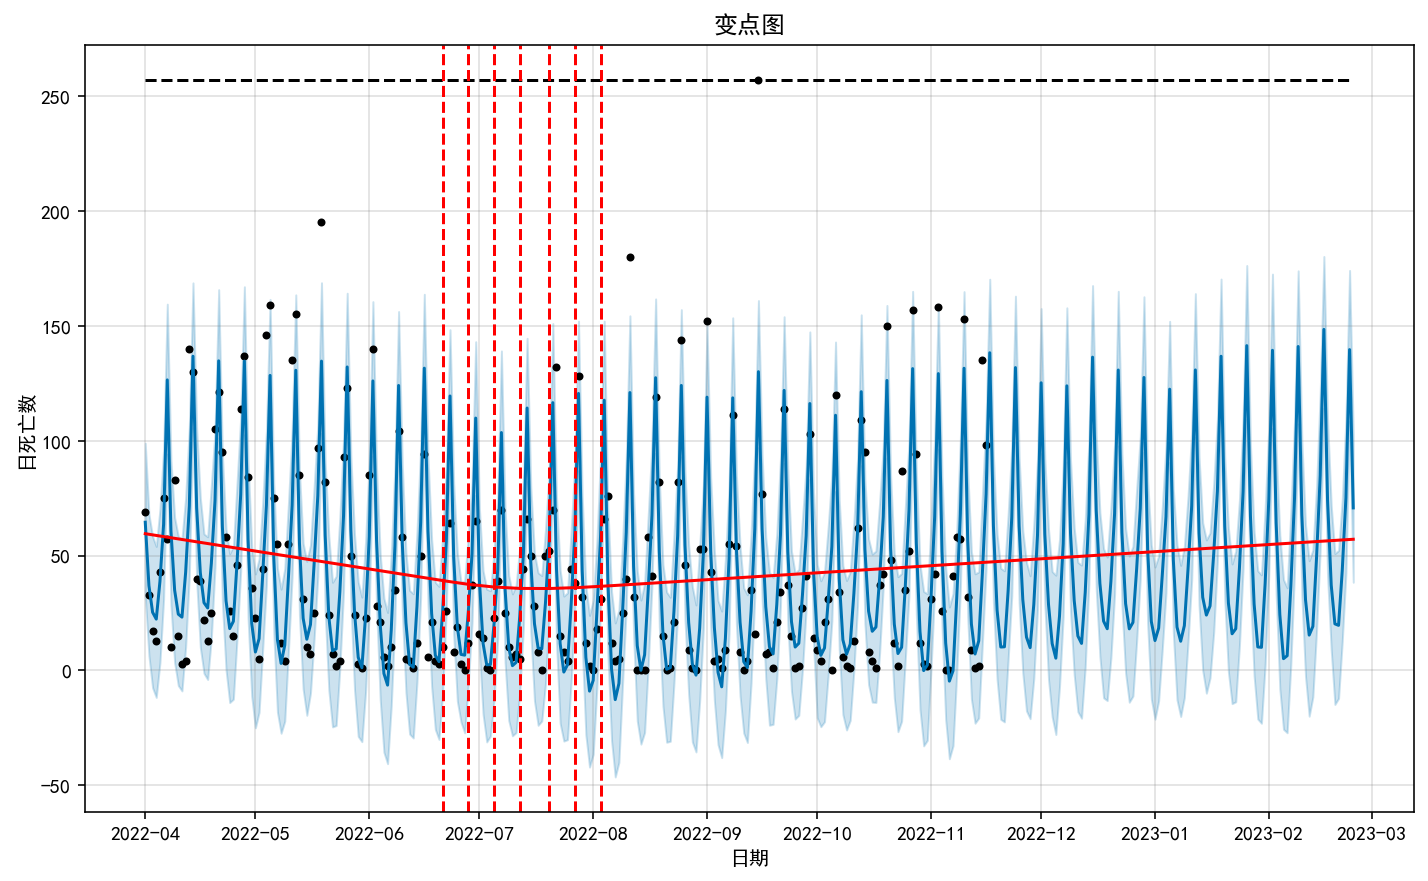

In [18]:
##变点选择
m = Prophet( 
       # changepoint_range=0.9,
#         daily_seasonality= False,
#         yearly_seasonality=True, #年周期性
#         weekly_seasonality=True #周周期性
        ##holidays=holidays,#节假日
    )
m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.1)#添加月周期性 
#m.add_country_holidays(country_name='US')
m.fit(trainlist)
future = m.make_future_dataframe(periods=100)
forecast1 = m.predict(future)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print(f'There are {len(m.changepoints)} change points. \nThe change points dates are \n{df.loc[df["ds"].isin(m.changepoints)]}')
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.title('变点图')
plt.xlabel('日期')
plt.ylabel('日死亡数')
#plt.savefig('p4.png', dpi=750, bbox_inches = 'tight')

### 优化模型

In [155]:
m = Prophet(
        changepoint_prior_scale=0.01, 
        changepoints=['2022-04-08','2022-04-16','2022-04-23','2022-04-30','2022-05-08','2022-05-15','2022-05-22','2022-05-30','2022-06-06',
                      '2022-06-13','2022-06-21','2022-06-28',
                     '2022-07-05','2022-07-12','2022-07-20',
                     '2022-07-27','2022-08-03','2022-08-11','2022-08-18','2022-08-25','2022-09-02','2022-09-09','2022-09-16','2022-09-24','2022-10-01'],
        seasonality_prior_scale= 0.1,
        holidays_prior_scale=0.01,
        #changepoint_range=0.7,
        daily_seasonality=False,
        #yearly_seasonality=True, #年周期性
        weekly_seasonality=True, #周周期性
        ##holidays=holidays,#节假日
       # growth="linear" ##线性回归
    )
m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.1)#添加月周期性 
m.add_country_holidays(country_name='US')

In [156]:
m.fit(trainlist)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [157]:
future = m.make_future_dataframe(periods=100, freq='D')#预测时长
future['cap'] = trainlist.y.values.max()
future['floor'] = trainlist.y.values.min()
forecast = m.predict(future)

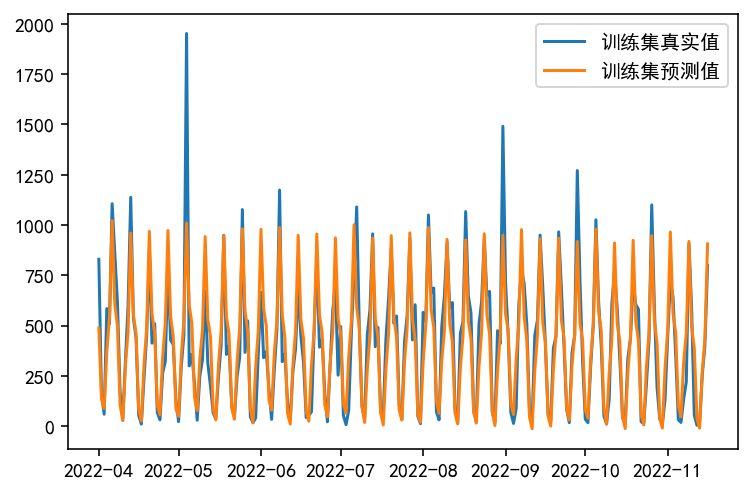

In [158]:
plt.plot(trainlist['ds'],trainlist['y'], label='训练集真实值')
plt.plot(forecast.iloc[0:230]['ds'],forecast.iloc[0:230]['yhat'], label='训练集预测值')
plt.legend()
#plt.savefig('p22.png', dpi=750, bbox_inches = 'tight')
plt.show()

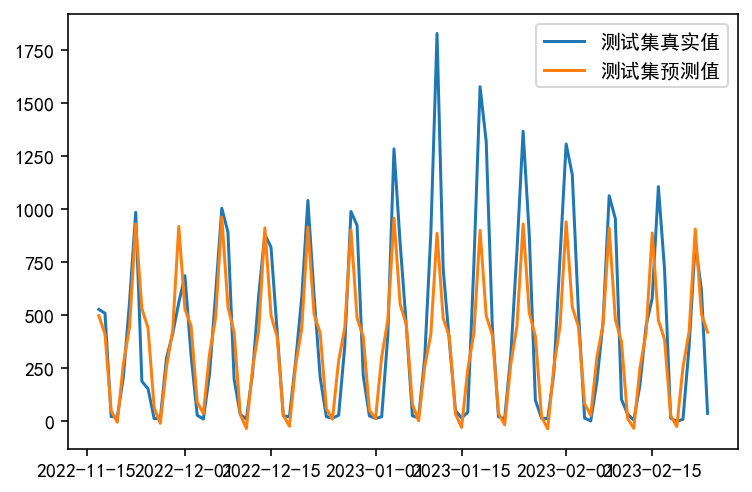

In [159]:
plt.plot(testlist['ds'],testlist['y'],label='测试集真实值')
plt.plot(forecast.iloc[230:330]['ds'],forecast.iloc[230:330]['yhat'],label='测试集预测值')
plt.legend()
#plt.savefig('p33.png', dpi=750, bbox_inches = 'tight')
plt.show()

In [160]:
## 评估模型
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
test=testlist['y'].values.reshape(-1,1)
test1 = scaler.fit_transform(test)
fore=forecast.iloc[230:330]['yhat'].values.reshape(-1,1)
fore1=scaler.fit_transform(fore)
# calculate MSE 均方误差
mse=mean_squared_error(test1,fore1)
# calculate RMSE 均方根误差
rmse = math.sqrt(mean_squared_error(test1,fore1))
#calculate MAE 平均绝对误差
mae=mean_absolute_error(test1,fore1)
#calculate R square
r_square=r2_score(test,fore)
print('均方误差MSE: %.6f' % mse)
print('均方根误差RMSE: %.6f' % rmse)
print('平均绝对误差MAE: %.6f' % mae)
print('R_square: %.6f' % r_square)

均方误差MSE: 0.053530
均方根误差RMSE: 0.231366
平均绝对误差MAE: 0.180554
R_square: 0.657915


### 熵权法确定权重

In [41]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
 
"""
Created on Fri Mar 23 10:48:36 2018
@author: Big Teacher Brother
"""
import pandas as pd
import numpy as np
import math
from numpy import array
 
# 1读取数据
df = pd.read_csv(r'C:\Users\lmr18\Desktop\2.csv',encoding='gbk')
# 2数据预处理 ,去除空值的记录
df.dropna()
 
#定义熵值法函数
def cal_weight(x):
    '''熵值法计算变量的权重'''
    # 标准化
    x = x.apply(lambda x: ((x - np.min(x)) / (np.max(x) - np.min(x))))
 
    # 求k
    rows = x.index.size  # 行
    cols = x.columns.size  # 列
    k = 1.0 / math.log(rows)
 
    lnf = [[None] * cols for i in range(rows)]
 
    # 矩阵计算--
    # 信息熵
    # p=array(p)
    x = array(x)
    lnf = [[None] * cols for i in range(rows)]
    lnf = array(lnf)
    for i in range(0, rows):
        for j in range(0, cols):
            if x[i][j] == 0:
                lnfij = 0.0
            else:
                p = x[i][j] / x.sum(axis=0)[j]
                lnfij = math.log(p) * p * (-k)
            lnf[i][j] = lnfij
    lnf = pd.DataFrame(lnf)
    E = lnf
 
    # 计算冗余度
    d = 1 - E.sum(axis=0)
    # 计算各指标的权重
    w = [[None] * 1 for i in range(cols)]
    for j in range(0, cols):
        wj = d[j] / sum(d)
        w[j] = wj
        # 计算各样本的综合得分,用最原始的数据
    
    w = pd.DataFrame(w)
    return w
 
 
if __name__ == '__main__':
    # 计算df各字段的权重
    w = cal_weight(df)  # 调用cal_weight
    w.index = df.columns
    w.columns = ['weight']
    print(w)
    print('运行完成!')

         weight
lstm1  0.698019
lstm3  0.301981
运行完成!


### 组合模型求解

In [42]:
#### 加载数据并进行统计描述
from pandas import read_csv
import pandas as pd
# 加载数据
df = read_csv(r'C:\Users\lmr18\Desktop\22.csv',encoding='gbk')
print(df.shape)
print(df.head())


(97, 4)
    actu        prec1        prec2        prec3
0  47661  47534.10171  47533.30641  43269.10401
1  47682  47607.45680  47604.08511  43338.25192
2  47688  47705.86894  47695.50840  43443.81687
3  47688  47721.79638  47710.76605  43459.59379
4  47717  47728.55307  47717.91136  43464.12183


In [47]:
## 评估模型
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
test=df['actu'].values.reshape(-1,1)
test1 = scaler.fit_transform(test)
fore1=df['prec1'].values.reshape(-1,1)
fore11=scaler.fit_transform(fore1)
# calculate MSE 均方误差
mse=mean_squared_error(test1,fore11)
# calculate RMSE 均方根误差
rmse = math.sqrt(mean_squared_error(test1,fore11))
#calculate MAE 平均绝对误差
mae=mean_absolute_error(test1,fore11)
#calculate R square
r_square=r2_score(test,fore1)
print('均方误差MSE: %.6f' % mse)
print('均方根误差RMSE: %.6f' % rmse)
print('平均绝对误差MAE: %.6f' % mae)
print('R_square: %.6f' % r_square)

均方误差MSE: 0.000553
均方根误差RMSE: 0.023523
平均绝对误差MAE: 0.019573
R_square: 0.996805


In [48]:
## 评估模型
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
test=df['actu'].values.reshape(-1,1)
test1 = scaler.fit_transform(test)
fore2=df['prec2'].values.reshape(-1,1)
fore12=scaler.fit_transform(fore2)
# calculate MSE 均方误差
mse=mean_squared_error(test1,fore12)
# calculate RMSE 均方根误差
rmse = math.sqrt(mean_squared_error(test1,fore12))
#calculate MAE 平均绝对误差
mae=mean_absolute_error(test1,fore12)
#calculate R square
r_square=r2_score(test,fore2)
print('均方误差MSE: %.6f' % mse)
print('均方根误差RMSE: %.6f' % rmse)
print('平均绝对误差MAE: %.6f' % mae)
print('R_square: %.6f' % r_square)

均方误差MSE: 0.000494
均方根误差RMSE: 0.022227
平均绝对误差MAE: 0.018256
R_square: 0.995569


In [49]:
## 评估模型
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
test=df['actu'].values.reshape(-1,1)
test1 = scaler.fit_transform(test)
fore3=df['prec3'].values.reshape(-1,1)
fore13=scaler.fit_transform(fore3)
# calculate MSE 均方误差
mse=mean_squared_error(test1,fore13)
# calculate RMSE 均方根误差
rmse = math.sqrt(mean_squared_error(test1,fore13))
#calculate MAE 平均绝对误差
mae=mean_absolute_error(test1,fore13)
#calculate R square
r_square=r2_score(test,fore3)
print('均方误差MSE: %.6f' % mse)
print('均方根误差RMSE: %.6f' % rmse)
print('平均绝对误差MAE: %.6f' % mae)
print('R_square: %.6f' % r_square)

均方误差MSE: 0.000824
均方根误差RMSE: 0.028699
平均绝对误差MAE: 0.024470
R_square: -15.581886


In [26]:
## 评估模型
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
test=df['actu'].values.reshape(-1,1)
test1 = scaler.fit_transform(test)
fore4=df['prec4'].values.reshape(-1,1)
fore14=scaler.fit_transform(fore4)
# calculate MSE 均方误差
mse=mean_squared_error(test1,fore14)
# calculate RMSE 均方根误差
rmse = math.sqrt(mean_squared_error(test1,fore14))
#calculate MAE 平均绝对误差
mae=mean_absolute_error(test1,fore14)
#calculate R square
r_square=r2_score(test,fore4)
print('均方误差MSE: %.6f' % mse)
print('均方根误差RMSE: %.6f' % rmse)
print('平均绝对误差MAE: %.6f' % mae)
print('R_square: %.6f' % r_square)

均方误差MSE: 0.004164
均方根误差RMSE: 0.064529
平均绝对误差MAE: 0.053551
R_square: 0.778539


### 画出最优效果图

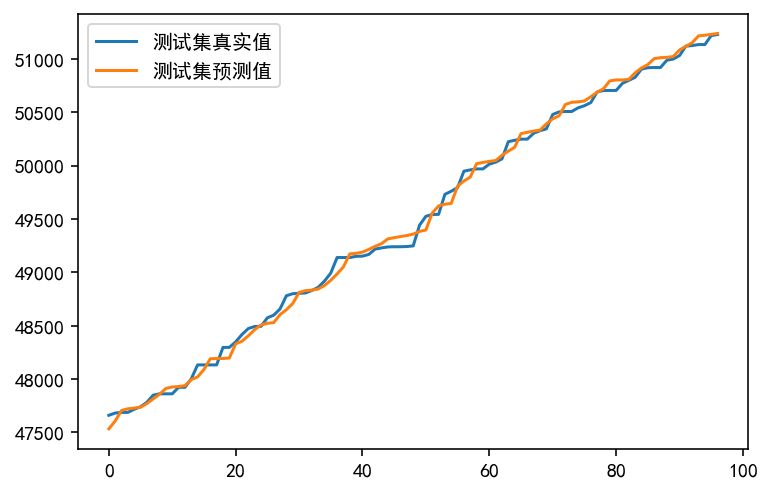

In [51]:

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.plot(df['actu'],label='测试集真实值')
plt.plot(df['prec1'],label='测试集预测值')
plt.legend()
#plt.savefig('p3.png', dpi=750, bbox_inches = 'tight')
plt.show()